In [1]:
from math import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [116]:
data = np.array([(0.1, 0.02523, 0.00200768, -0.000328909, 0.00212281, -0.000547226, 0.00231122, 0.000454994, 0.00215121, -0.000378604, 0.00186627),
(0.2, 0.0504191, 0.00164652, -0.000358371, 0.00170915, 0.000328963, 0.00169726, -0.000757137, 0.00194539, 0.00123583, 0.00218579),
(0.3, 0.0747612, 0.00193735, 0.000275159, 0.00198899, 0.000176513, 0.0017363, -0.000603784, 0.00243967, -1.58513e-05, 0.00175208),
(0.4, 0.0991427, 0.00208908, 0.000513835, 0.0021625, -0.000729021, 0.0017427, 0.000407294, 0.00151425, 0.00016419, 0.00231959),
(0.5, 0.124656, 0.00206172, 0.000108171, 0.00227648, -0.00137454, 0.001807, 0.000341027, 0.00244984, -0.000213733, 0.00207546),
(0.6, 0.148554, 0.00147341, 0.00045178, 0.00221337, -0.000220763, 0.00281445, -0.000172788, 0.00264793, -0.000363637, 0.00212617),
(0.7, 0.172253, 0.0027644, 0.000585696, 0.00213375, -8.12671e-05, 0.00158256, -0.000289421, 0.00170677, -0.000145643, 0.00177665),
(0.8, 0.195794, 0.00199203, 0.00193066, 0.00173689, 0.000742256, 0.00263183, -0.000188398, 0.00156052, -0.000397987, 0.00196455),
(0.9, 0.219827, 0.00210505, 0.00250553, 0.00203044, 0.000467508, 0.00239658, -0.000427122, 0.00189325, 0.000625086, 0.00179292),
(1, 0.242907, 0.00170161, 0.00326058, 0.00203516, -0.000656603, 0.00183792, 0.000594974, 0.00174033, 0.000327045, 0.00200588),
(1.1, 0.267167, 0.00222084, 0.00612525, 0.00211692, 0.00142245, 0.00137264, -0.000507906, 0.00186674, -0.000523889, 0.00201682),
(1.2, 0.290908, 0.00194376, 0.00703726, 0.00203735, -0.000340158, 0.0016186, -0.00084483, 0.0020903, 0.000416301, 0.00122358),
(1.3, 0.312464, 0.00188061, 0.00963377, 0.00246539, -0.000408958, 0.00183821, 0.000255491, 0.00141031, 0.000406623, 0.00163877),
(1.4, 0.338802, 0.00191784, 0.0129574, 0.00170989, 0.000439254, 0.00258784, -0.000655106, 0.0022043, -0.00026399, 0.00155014),
(1.5, 0.362131, 0.00176384, 0.0174391, 0.00201833, 0.000990924, 0.00230205, 0.000242073, 0.00165535, 0.000347248, 0.00237872),
(1.6, 0.38719, 0.00181837, 0.0239197, 0.00223561, 0.000511742, 0.00226626, -0.000537511, 0.00193179, 0.000419949, 0.00218286),
(1.7, 0.414155, 0.00156244, 0.0317794, 0.0016862, 0.00072276, 0.00213026, -0.000648953, 0.00249996, -0.000433168, 0.00179023),
(1.8, 0.439931, 0.00186073, 0.0401876, 0.00215501, 0.00114137, 0.00182286, -0.00081431, 0.00203654, -0.00110269, 0.00247363),
(1.9, 0.468897, 0.00154317, 0.0540263, 0.00229953, 0.000949628, 0.00180733, -1.82867e-05, 0.00211535, -0.00021571, 0.00189828),
(2, 0.500063, 0.00155965, 0.0727065, 0.00274038, 0.00471951, 0.00256447, -0.0003781, 0.00230466, 0.000806167, 0.00171183),
(2.1, 0.53071, 0.00157205, 0.0948032, 0.00249369, 0.00601648, 0.00242521, 0.00091892, 0.00208372, 0.000109406, 0.00180238),
(2.2, 0.570148, 0.00160017, 0.137772, 0.00246636, 0.0176564, 0.0020997, 0.00183401, 0.00224235, 0.000271248, 0.00191966),
(2.3, 0.600741, 0.00149718, 0.178299, 0.00242238, 0.034409, 0.0027305, 0.00457574, 0.00205129, -7.13107e-05, 0.00199172),
(2.4, 0.626436, 0.00141821, 0.214992, 0.00370163, 0.0534337, 0.0020125, 0.010396, 0.00187168, 0.0013707, 0.00196296),
(2.5, 0.646857, 0.00108674, 0.241835, 0.00227276, 0.0664898, 0.0026415, 0.0141159, 0.00200154, 0.00173247, 0.00253088),
(2.6, 0.664094, 0.00162108, 0.271335, 0.00258386, 0.0834234, 0.00297318, 0.0206928, 0.00113827, 0.00391951, 0.00214747),
(2.7, 0.67856, 0.000853357, 0.291894, 0.00206198, 0.098337, 0.00195261, 0.0250122, 0.00215983, 0.00481112, 0.00220476),
(2.8, 0.695069, 0.00233347, 0.316248, 0.00344312, 0.110502, 0.00360879, 0.0287995, 0.00248517, 0.00610172, 0.0019629),
(2.9, 0.70607, 0.000842615, 0.334122, 0.00281651, 0.12531, 0.00254675, 0.0361658, 0.00230141, 0.00907529, 0.00177445),
(3, 0.717104, 0.00129764, 0.350786, 0.00345471, 0.133449, 0.0042937, 0.0381014, 0.00374328, 0.00783527, 0.00210303)])

β = data.T[0,:]
W1μ = data.T[1,:]
W1σ = data.T[2,:]
W2σ = data.T[4,:]
W3μ = data.T[5,:]
W3σ = data.T[6,:]
W4μ = data.T[7,:]
W4σ = data.T[8,:]
W5μ = data.T[9,:]
W5σ = data.T[10,:]

a2K = np.zeros(30)
a2Kσ = np.zeros(30)

In [117]:
def W(s, a, b, c):
    return np.exp(-(a + b*s + c*s**2))

for i in range(20,30):
    popt, pcov = curve_fit(W, np.arange(1,6),
                          [W1μ[i], W2μ[i], W3μ[i], W4μ[i], W5μ[i]],
                          sigma=[W1σ[i], W2σ[i], W3σ[i], W4σ[i], W5σ[i]],
                          absolute_sigma=True)
    a2K[i] = popt[2]
    a2Kσ[i] = sqrt(pcov[2,2])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [118]:
def W(s, b, c):
    return np.exp(-(b*s + c*s**2))

for i in range(10,20):
    popt, pcov = curve_fit(W, np.arange(1,3),
                          [W1μ[i], W2μ[i]],
                          sigma=[W1σ[i], W2σ[i]],
                          absolute_sigma=True)
    a2K[i] = popt[1]
    a2Kσ[i] = sqrt(pcov[1,1])

In [119]:
def W(s, c):
    return np.exp(-c*s**2)

for i in range(0,10):
    popt, pcov = curve_fit(W, np.arange(1,3),
                          [W1μ[i]],
                          sigma=[W1σ[i]],
                          absolute_sigma=True)
    a2K[i] = popt[0]
    a2Kσ[i] = sqrt(pcov[0,0])

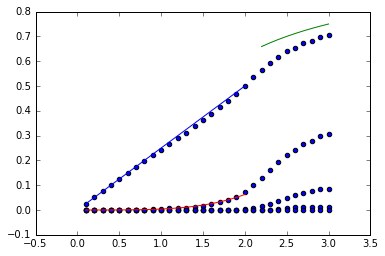

In [18]:
plt.scatter(β, W1μ)
plt.scatter(β, W2μ)
plt.scatter(β, W3μ)
plt.scatter(β, W4μ)
plt.scatter(β, W5μ)
plt.plot(β[β<2.1], β[β<2.1]/4)
plt.plot(β[β>2.1], 1 - 3/(4*β[β>2.1]))
plt.plot(β[β<2.1], (β[β<2.1]/4)**4)
#plt.plot(β[β>2.1], 1-3.0/(4*β[β>2.1]))
#plt.errorbar(β, W1μ, yerr=W1σ)
#plt.scatter(np.arange(1,6), [W1μ[5], W2μ[5], W3μ[5], W4μ[5], W5μ[5]])
#plt.scatter(np.arange(1,6), [0.768584, 0.590902, 0.453493, 0.348141, 0.267631])
plt.show()

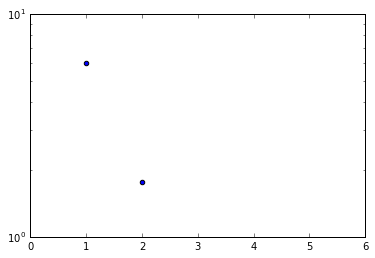

In [70]:
plt.scatter(np.arange(1,6), 10*np.abs([W1μ[22], W2μ[22], W3μ[22], W4μ[22], W5μ[22]]))
plt.yscale("log")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


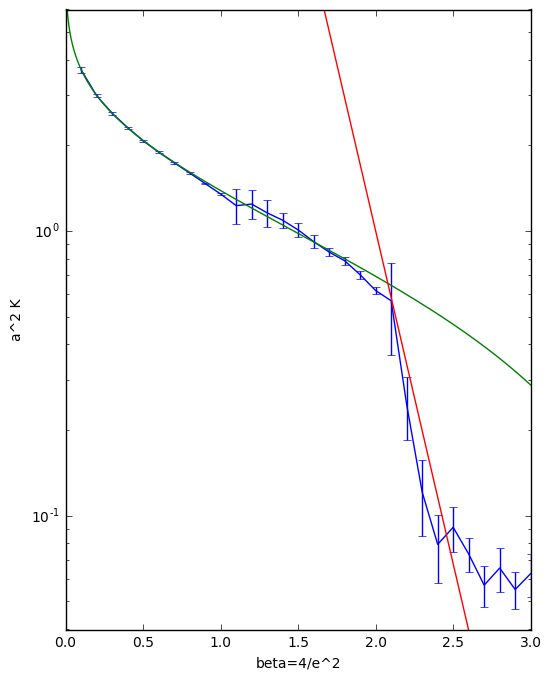

In [124]:
fig = plt.figure(num=None, figsize=(6,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_autoscale_on(False)
ax.set_xlim([0,3])
ax.set_ylim([10**(-1.4),6])
#ax.set_aspect(1.5)

plt.errorbar(β, a2K, yerr=a2Kσ, )
plt.plot(np.arange(3000)/1000, -np.log(np.arange(3000)/4000))
plt.plot(np.arange(1600)/1000+1.6, np.exp(-6*pi**2/11 * (np.arange(1600)/1000 - 0.4)))
plt.yscale("log")

plt.xlabel("beta=4/e^2")
plt.ylabel("a^2 K")
plt.show()

In [6]:
# k = 1, β = 2.3
from random import random
a = []
for i in range(10000):
    w = exp(-4.6)
    
    xtrial = random()*(1.0 - w) + w
    a0 = 1 + log(xtrial)/(2.3)
    while sqrt(1-a0*a0) < random():
        xtrial = random()*(1.0 - w) + w
        a0 = 1 + log(xtrial)/(2.3)
    a += [a0]

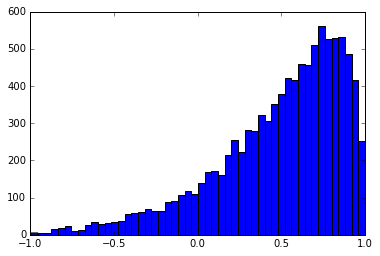

In [7]:
plt.hist(a, 50)
plt.show()

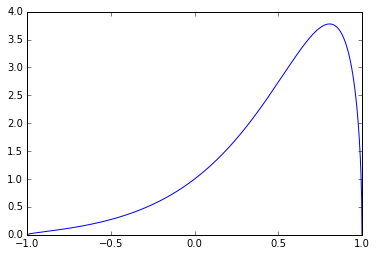

In [8]:
def p(a):
    return np.sqrt(1-a**2)*np.exp(a*2.3)
    
plt.plot(1 - np.arange(1000)/500.0, p(1 - np.arange(1000)/500.0))
plt.show()

In [9]:
print(p(np.arange(1000)/1000.0))

[ 1.          1.00230215  1.00460859  1.00691933  1.00923438  1.01155373
  1.01387741  1.01620541  1.01853773  1.02087438  1.02321537  1.02556071
  1.02791039  1.03026443  1.03262282  1.03498557  1.0373527   1.03972419
  1.04210007  1.04448033  1.04686498  1.04925402  1.05164746  1.0540453
  1.05644756  1.05885422  1.06126531  1.06368082  1.06610076  1.06852514
  1.07095395  1.07338721  1.07582492  1.07826709  1.08071371  1.0831648
  1.08562036  1.08808039  1.0905449   1.09301389  1.09548738  1.09796536
  1.10044784  1.10293482  1.10542631  1.10792232  1.11042284  1.11292789
  1.11543746  1.11795157  1.12047022  1.12299341  1.12552115  1.12805344
  1.13059028  1.13313169  1.13567767  1.13822821  1.14078334  1.14334304
  1.14590733  1.14847621  1.15104969  1.15362776  1.15621044  1.15879773
  1.16138963  1.16398615  1.16658729  1.16919306  1.17180346  1.17441849
  1.17703817  1.17966249  1.18229147  1.18492509  1.18756338  1.19020633
  1.19285394  1.19550623  1.1981632   1.20082484  1.2